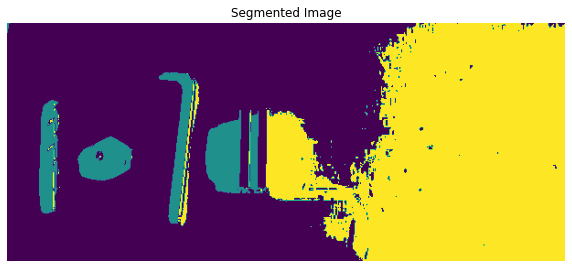

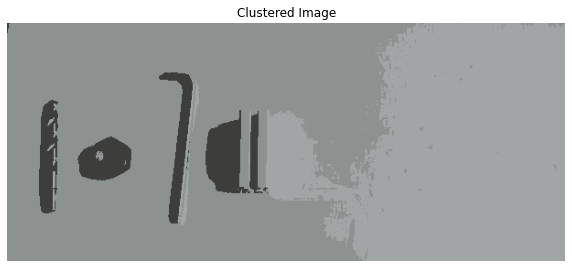

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image
image = cv2.imread("image_001.jpg")
if image is None:
    print("Error: Could not load the image.")
else:
    # Crop a specific region from the image
    cropped_image = image[150:410, 30:640]

    # Convert the cropped image from BGR to RGB
    cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

    # Reshape the image data into a 2D array of pixels
    pixels = cropped_image_rgb.reshape((-1, 3))

    # Apply K-Means clustering with 3 clusters
    kmeans = KMeans(n_clusters=3, random_state=0)
    kmeans.fit(pixels)
    labels = kmeans.labels_

    # Reshape the labels to match the image dimensions
    segmented_image = labels.reshape(cropped_image.shape[:2])

    # Show the segmented image
    plt.figure(figsize=(10, 5))
    plt.imshow(segmented_image, cmap='viridis')
    plt.title("Segmented Image")
    plt.axis("off")
    plt.show()

    # Create a new image showing clusters with their corresponding colors
    clustered_image = np.zeros_like(cropped_image_rgb)
    for i in range(3):
        clustered_image[segmented_image == i] = kmeans.cluster_centers_[i]

    # Display the color-coded clustered image
    plt.figure(figsize=(10, 5))
    plt.imshow(clustered_image.astype(np.uint8))
    plt.title("Clustered Image")
    plt.axis("off")
    plt.show()
